In [2]:
import io
import json
import os
import random
import string

import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [3]:
print(os.listdir("./input"))

['test.csv', 'destinations.csv', 'sample_submission.csv', 'train.csv']


In [4]:
%matplotlib inline

In [6]:
train = pd.read_csv("./input/train.csv", nrows=100000)

test = pd.read_csv("./input/test.csv", nrows=100000)

destination = pd.read_csv("./input/destinations.csv", nrows=100000)

In [9]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [10]:
test.head(5)

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [11]:
destination.head(5)

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [12]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

<iframe src="https://www.kaggle.com/embed/ajay1216/practical-guide-on-data-preprocessing-in-python?cellIds=12&kernelSessionId=5901384" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Guide on Data Preprocessing in Python"></iframe>

https://www.kaggle.com/ajay1216/practical-guide-on-data-preprocessing-in-python?cellIds=12&kernelSessionId=5901384

#### Features

|  Feature |  Description | 
|----------|:---------|
| date_time  | Timestamp     |
| site_name | ID of Expedia point of sale|
| posa_continent | ID of site’s continent |
| user_location_country |ID of customer’s country |
| user_location_region|ID of customer’s region |
| user_location_city| ID of customer’s city|
| orig_destination_distance| Physical distance between a hotel and a customer|
| user_id| ID of user|
| is_mobile| 1 for mobile device, 0 otherwise|
| is_package| 1 if booking/click was part of package, 0 otherwise|
| channel| ID of a marketing channel|
| srch_ci| Check-in date|
| srch_co| Check-out date|
| srch_adults_cnt| Number of adults|
| srch_children_cnt| Number of children|
| srch_rm_cnt| Number of rooms|
| srch_destination_id| ID of the destination|
| srch_destination_type_id| Type of destination|
| is_booking | 1 if a booking, 0 if a click|
| cnt| Number of similar events in the context of the same user sessiont|
| hotel_continent| Hotel continent|
| hotel_country| Hotel country|
| hotel_market| Hotel market|
| hotel_cluster| ID of hotel cluster|


In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train["hotel_cluster"].count()).sort_values(
    ascending=False
)

In [16]:
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])

missing_data.head(20)

,Total,Percent
orig_destination_distance,36922,0.36922
srch_co,71,0.00071
srch_ci,71,0.00071
srch_adults_cnt,0,0.00000
hotel_market,0,0.00000
hotel_country,0,0.00000
hotel_continent,0,0.00000
cnt,0,0.00000
is_booking,0,0.00000
srch_destination_type_id,0,0.00000


<AxesSubplot:>

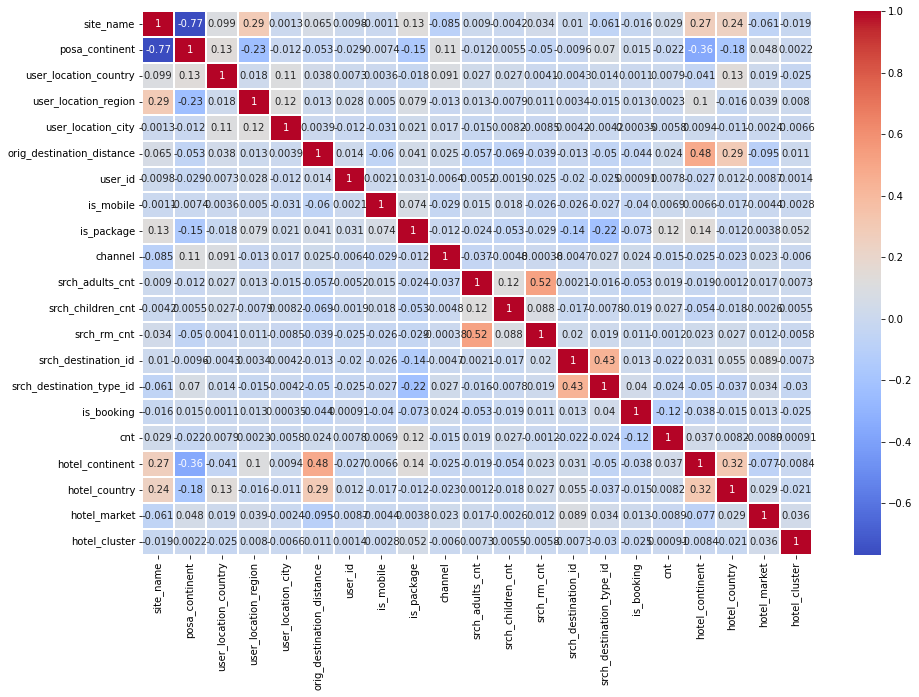

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(), cmap="coolwarm", ax=ax, annot=True, linewidths=2)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='posa_continent', ylabel='count'>

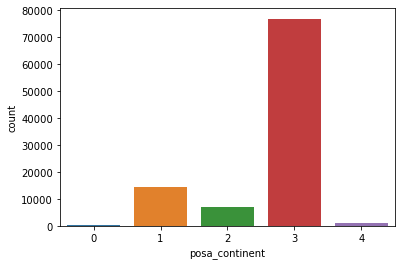

In [19]:
# Frequency of posa continent
fix, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot("posa_continent", data=train, order=[0, 1, 2, 3, 4], ax=ax)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

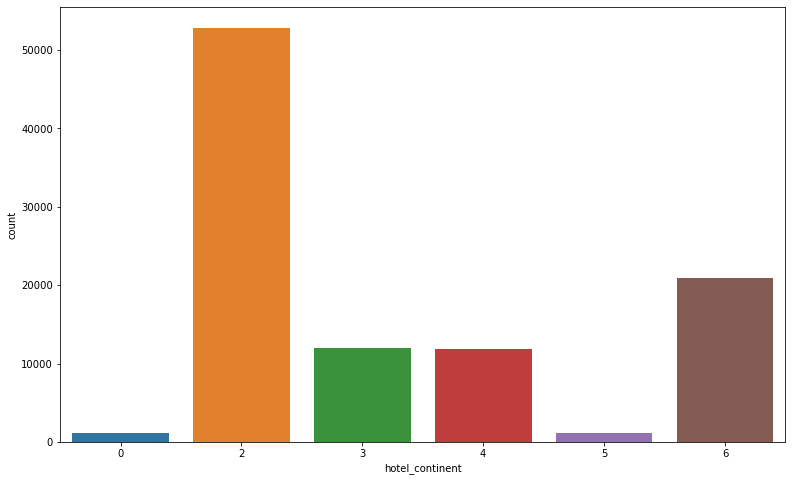

In [20]:
# frequency of hotel continent

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot("hotel_continent", ax=ax, data=train, order=[0, 2, 3, 4, 5, 6])

<AxesSubplot:xlabel='is_mobile', ylabel='count'>

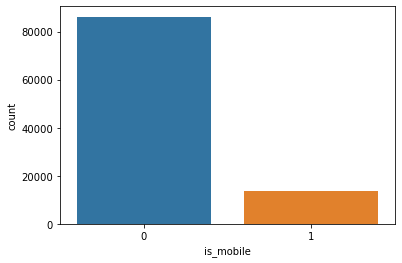

In [23]:
# Frequency of booking through mobile
fix, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x="is_mobile", data=train, order=[0, 1], ax=ax)

<AxesSubplot:xlabel='is_package', ylabel='count'>

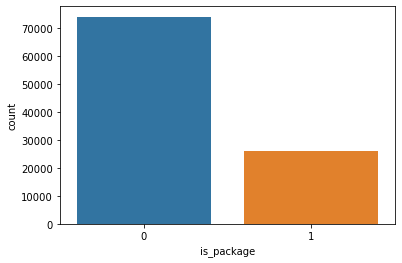

In [24]:
# Frequency of booking with package
fix, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x="is_package", data=train, order=[0, 1], ax=ax)

## Clean the data 🧹🪄

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

### Convert it into numerical values which will be relevant to our model.
- date_time
- srch_ci
- srch_co


## Add Extra features
Extract relevant information from date columns
### Additional attributes
- stay_dur: number of duration of stay
- no_of_days_bet_booking: number of days between the booking and 
- Cin_day: Check-in day
- Cin_month: Check-in month
- Cin_year: Check-out year

In [30]:
def convert_date_into_days(df):
    df["srch_ci"] = pd.to_datetime(df["srch_ci"])
    df["srch_co"] = pd.to_datetime(df["srch_co"])
    df["date_time"] = pd.to_datetime(df["date_time"])

    df["stay_dur"] = (df["srch_co"] - df["srch_ci"]).astype("timedelta64[D]")
    df["no_of_days_bet_booking"] = (df["srch_ci"] - df["date_time"]).astype(
        "timedelta64[D]"
    )

    # For hotel check-in
    # Month, Year, Day
    df["Cin_day"] = df["srch_ci"].apply(lambda x: x.day)
    df["Cin_month"] = df["srch_ci"].apply(lambda x: x.month)
    df["Cin_year"] = df["srch_ci"].apply(lambda x: x.year)

In [31]:
convert_date_into_days(train)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  63078 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99929 non-null   datetime6

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_month', ylabel='count'>

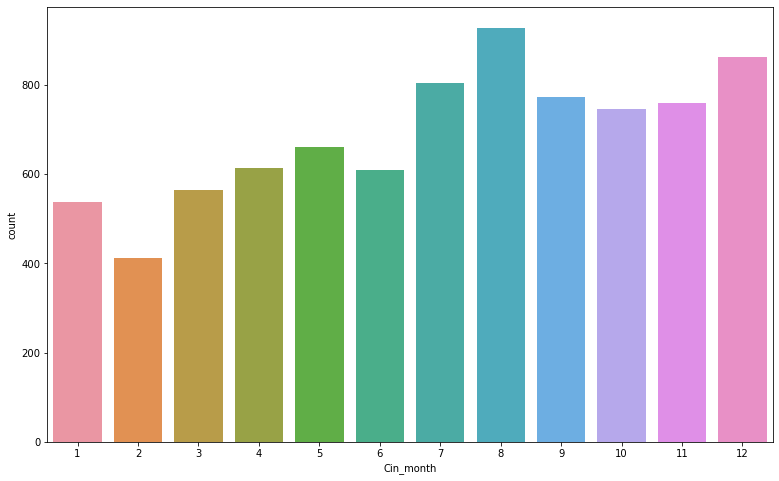

In [35]:
# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(
    "Cin_month",
    data=train[train["is_booking"] == 1],
    order=list(range(1, 13)),
    ax=ax,
)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_day', ylabel='count'>

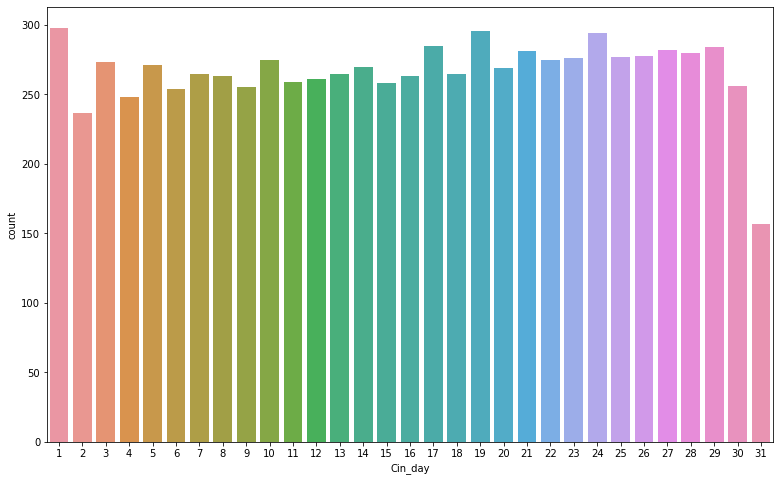

In [36]:
# Count the bookings as per the day
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(
    "Cin_day",
    data=train[train["is_booking"] == 1],
    order=list(range(1, 32)),
    ax=ax,
)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_dur', ylabel='count'>

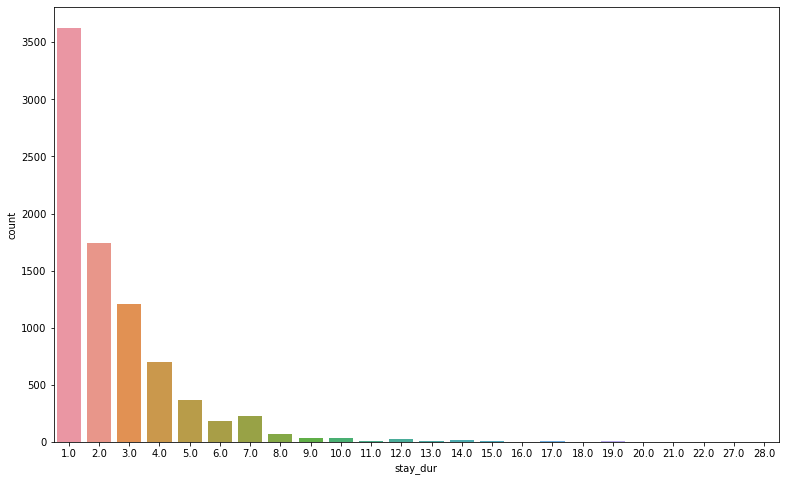

In [37]:
# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot("stay_dur", data=train[train["is_booking"] == 1], ax=ax)

In [39]:
# Check the percentage of NaN in the dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train["hotel_cluster"].count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])

missing_data

,Total,Percent
orig_destination_distance,36922,0.36922
Cin_year,71,0.00071
Cin_month,71,0.00071
Cin_day,71,0.00071
no_of_days_bet_booking,71,0.00071
stay_dur,71,0.00071
srch_ci,71,0.00071
srch_co,71,0.00071
srch_destination_id,0,0.00000
hotel_cluster,0,0.00000


In [44]:
# Fill nan with the day which has max occurence¶

# train['Cin_day'].value_counts() = 26
# train['Cin_month'].value_counts() = 8
# train['Cin_year'].value_counts() = 2014
# train['stay_dur'].value_counts() = 1
# train['no_of_days_bet_booking'].value_counts() = 0

In [46]:
train["Cin_day"] = train["Cin_day"].fillna(26.0)
train["Cin_month"] = train["Cin_month"].fillna(8.0)
train["Cin_year"] = train["Cin_year"].fillna(2014.0)
train["stay_dur"] = train["stay_dur"].fillna(1.0)
train["no_of_days_bet_booking"] = train["no_of_days_bet_booking"].fillna(0.0)

In [50]:
# Fill average values in place for nan, fill with mean
train["orig_destination_distance"].fillna(
    train["orig_destination_distance"].mean(), inplace=True
)

In [51]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


In [56]:
# Remove datetime object from the dataeset
# Columns to remove

user_id = train["user_id"]
columns = [
    "date_time",
    "srch_ci",
    "srch_co",
    "user_id",
    "srch_destination_type_id",
    "srch_destination_id",
]
train.drop(
    columns=columns, axis=1, inplace=True
)  # axis = 1 -> 1: Columns (Drop the columns)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  100000 non-null  int64  
 1   posa_continent             100000 non-null  int64  
 2   user_location_country      100000 non-null  int64  
 3   user_location_region       100000 non-null  int64  
 4   user_location_city         100000 non-null  int64  
 5   orig_destination_distance  100000 non-null  float64
 6   is_mobile                  100000 non-null  int64  
 7   is_package                 100000 non-null  int64  
 8   channel                    100000 non-null  int64  
 9   srch_adults_cnt            100000 non-null  int64  
 10  srch_children_cnt          100000 non-null  int64  
 11  srch_rm_cnt                100000 non-null  int64  
 12  is_booking                 100000 non-null  int64  
 13  cnt                        100

In [66]:
train

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2,3,66,348,48862,2234.264100,0,1,9,2,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2,3,66,348,48862,2234.264100,0,1,9,2,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2,3,66,348,48862,2234.264100,0,0,9,2,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2,3,66,442,35390,913.193200,0,0,3,2,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2,3,66,442,35390,913.625900,0,0,3,2,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37,1,69,612,3062,1897.609161,0,0,5,2,...,1,6,180,1518,30,7.0,51.0,23.0,5.0,2013.0
99996,37,1,69,612,3062,1897.609161,0,0,3,2,...,1,6,180,1737,5,4.0,54.0,26.0,5.0,2013.0
99997,37,1,69,612,3062,1897.609161,0,0,3,2,...,1,6,180,1737,93,4.0,54.0,26.0,5.0,2013.0
99998,37,1,69,612,3062,1897.609161,0,0,3,2,...,1,6,180,1737,20,4.0,54.0,26.0,5.0,2013.0
